In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the data
file_path = r"FLAC\FLAC2D - Case 2a\Data.dat"
data = pd.read_csv(file_path, sep='\\s+', header=None, skiprows=2)

In [4]:
data.to_csv("Data4.csv", index=False)

In [6]:
data

,0,1,2,3,4,5,6
0,0.001,-4.002904e-38,-6.019864e-51,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.002,-3.656387e-39,-6.194231e-47,-7.526040e-74,-2.373717e-105,0.000000e+00,0.000000e+00
2,0.003,4.212314e-39,-8.696971e-45,-4.115620e-69,-1.082545e-96,-3.973651e-127,0.000000e+00
3,0.004,-2.712719e-39,-2.547244e-43,-5.867706e-66,-1.279383e-91,-1.650227e-119,-3.398131e-149
4,0.005,-1.208680e-38,-3.204112e-42,-1.418905e-63,-6.880629e-88,-3.054388e-114,-5.194564e-142
...,...,...,...,...,...,...,...
14995,14.996,-4.536948e-02,-3.903791e-02,8.766401e-02,-3.278463e-01,-1.364640e-02,4.362695e-01
14996,14.997,-4.489923e-02,-3.851161e-02,9.096889e-02,-3.237945e-01,-1.616082e-02,4.319529e-01
14997,14.998,-4.442272e-02,-3.798297e-02,9.419278e-02,-3.196443e-01,-1.865620e-02,4.275209e-01
14998,14.999,-4.394029e-02,-3.745230e-02,9.733568e-02,-3.153970e-01,-2.113175e-02,4.229737e-01


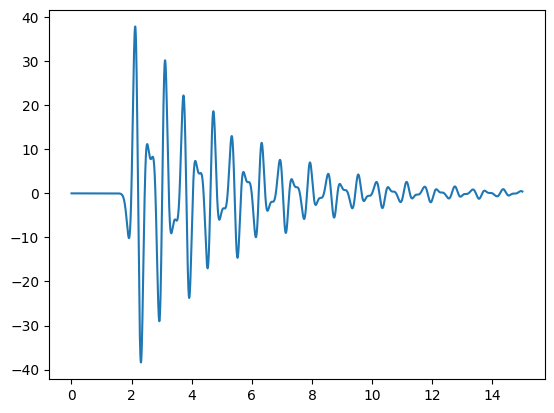

In [5]:
plt.plot(data.iloc[:,0], data.iloc[:,-1])

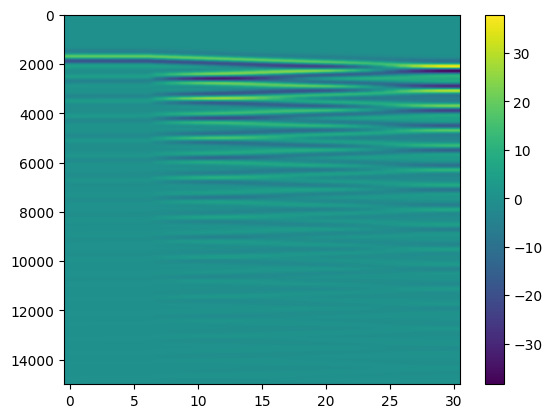

In [4]:
# Do a Bscan
bscan = data.iloc[:, 1:]
bscan.index = data.iloc[:, 0].values

# Plot the Bscan
plt.figure()
plt.imshow(bscan.values, aspect='auto')
plt.colorbar()
plt.show()

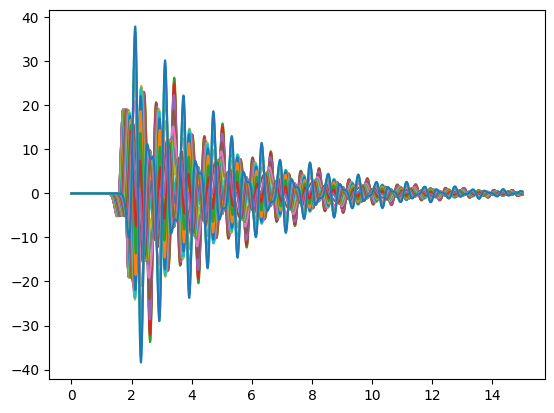

In [5]:
plt.plot(data[0], data.iloc[:, 1:])
plt.show()

# Perform some dynamical analysis

In [8]:
file_path = "Data/Data1.csv"
data1 = pd.read_csv(file_path, header=None)

In [11]:
data1.iloc[:,0]

0         0.000
1         0.001
2         0.002
3         0.003
4         0.004
          ...  
14996    14.996
14997    14.997
14998    14.998
14999    14.999
15000    15.000
Name: 0, Length: 15001, dtype: float64

In [24]:
# Get velocity from acceleration data
from scipy.integrate import cumulative_simpson, cumulative_trapezoid

acceleration = data1.iloc[:,1:].values 
time = data1.iloc[:,0].values

In [25]:
def veloctiy_displ_calc(acceleration, time):
    # Acceleration is a 2D array with mutliple acceleration columns
    velocity = np.zeros(acceleration.shape)
    displacement = np.zeros(acceleration.shape)
    for i in range(acceleration.shape[1]):
        velocity[:,i] = cumulative_trapezoid(acceleration[:,i], time, initial=0)
        displacement[:,i] = cumulative_trapezoid(velocity[:,i], time, initial=0)

    return velocity, displacement

In [26]:
acceleration.shape

(15001, 31)

In [29]:
velocity, displacement = veloctiy_displ_calc(acceleration, time)

In [35]:
# Save the data
velocity_df = pd.DataFrame(velocity)
displacement_df = pd.DataFrame(displacement)

#velocity_df.to_csv("Data/velocity.csv", index=False)
#displacement_df.to_csv("Data/displacement.csv", index=False)

# Do some interesting stuf

In [66]:
import pysindy as ps 

# Create the data 
t = time
X = np.concatenate([displacement[:,0].reshape(-1,1), displacement[:,-1].reshape(-1,1)], axis=1)
X_hat = np.concatenate([velocity[:,0].reshape(-1,1), velocity[:,-1].reshape(-1,1)], axis=1)

In [77]:
optimizer = ps.STLSQ(threshold=1e-1, normalize_columns=True)
feature_library = ps.PolynomialLibrary()
differentiation_method = ps.FiniteDifference(order=2)

In [78]:
model = ps.SINDy(
    optimizer=optimizer,
    feature_library=feature_library,
    differentiation_method=differentiation_method,
)
model.fit(X)

c:\Users\kurt-\miniconda3\Lib\site-packages\pysindy\optimizers\stlsq.py:191: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(


SINDy(differentiation_method=FiniteDifference(),
      feature_library=PolynomialLibrary(), feature_names=['x0', 'x1'],
      optimizer=STLSQ(normalize_columns=True))

In [80]:
model.print()

(x0)' = 0.000
(x1)' = 0.000


In [63]:
sim = model.simulate(X[0], t)

In [64]:
sim

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

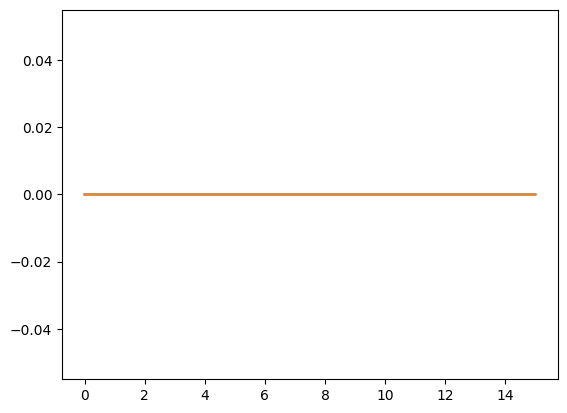

In [65]:
plt.figure()

plt.plot(t, sim)